In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

### 2. Data Preparation

### 2.1. Importing the Dataset

In [4]:
df= pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory=False)
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 2.2. Dataset Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
df["Complaint Type"].value_counts()

Complaint Type
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: count, dtype: int64

In [7]:
df["City"].value_counts()

City
BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDE

In [67]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

### 2.3. Adding new column “Request_Closing_Time”

### Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing.

In [10]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [40]:
df.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


### 2.4. Dropping Columns

In [41]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

### Write a python program to drop irrelevant Columns which are listed below.

In [42]:
drop_columns = [
    'Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1', 
    'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number',
    'School Region','School Code','School Phone Number','School Address','School City','School State','School Zip',
    'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up Location',
    'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',
    'Ferry Direction','Ferry Terminal Name','Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)',
    'Due Date','Resolution Action Updated Date','Community Board','Facility Type','Location']

df.drop(columns = drop_columns, axis=1, inplace=True)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23


In [43]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23


In [44]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaT,0
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31,0
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17,0
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33,0


### 2.5 NaN Values

In [45]:
df.isna().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
Hour                         0
dtype: int64

### Write a python program to remove the NaN missing values from updated dataframe

In [46]:
df=df.dropna()
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23


In [47]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0 days 00:38:29,0
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31,0
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17,0
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33,0


### 2.6. Unique values

### Write a python program to see the unique values from all the columns in the dataframe.

In [48]:
for each in df.columns:
    print("Column: ",each)
    print(df[each].nunique())
    print("_"*100)

Column:  Unique Key
291107
____________________________________________________________________________________________________
Column:  Created Date
251970
____________________________________________________________________________________________________
Column:  Closed Date
231991
____________________________________________________________________________________________________
Column:  Agency
1
____________________________________________________________________________________________________
Column:  Complaint Type
15
____________________________________________________________________________________________________
Column:  Descriptor
41
____________________________________________________________________________________________________
Column:  Location Type
14
____________________________________________________________________________________________________
Column:  Incident Zip
200
_________________________________________________________________________________________

### 3. Data Analysis

### Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame. 

## 3.1.1. Sum


In [49]:
df.select_dtypes(include='number').sum()

Unique Key                    9112107955295
Incident Zip                   3160833212.0
Latitude                    11855530.758778
Longitude                  -21520095.167682
Request_Closing_Time    52264 days 22:26:44
Hour                                3932048
dtype: object

## 3.1.2.Mean

In [50]:
df.select_dtypes(include='number').mean()

Unique Key                        31301576.242739
Incident Zip                         10857.977349
Latitude                                40.725681
Longitude                              -73.925035
Request_Closing_Time    0 days 04:18:32.132665995
Hour                                    13.507226
dtype: object

## 3.1.3. Standard Deviation

In [51]:
df.select_dtypes(include='number').std()

Unique Key                          575377.738707
Incident Zip                           580.280774
Latitude                                 0.082411
Longitude                                0.078654
Request_Closing_Time    0 days 06:03:45.509089128
Hour                                     7.164621
dtype: object

## 3.1.4. Skewness

In [52]:
df.select_dtypes(include="number",exclude = "timedelta").skew()

Unique Key      0.016898
Incident Zip   -2.553956
Latitude        0.123114
Longitude      -0.312739
Hour           -0.407687
dtype: float64

## 3.1.5. Kurtosis

In [53]:
df.select_dtypes(include="number",exclude = "timedelta").kurtosis()

Unique Key      -1.176593
Incident Zip    37.827777
Latitude        -0.734818
Longitude        1.455600
Hour            -0.996280
dtype: float64

### 3.2.  Correlation of variables

### Write a Python program to calculate and show correlation of all variables. 	

In [54]:
df.select_dtypes(include='number').corr()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time,Hour
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126,-0.017739
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182,-0.018636
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497,0.003438
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724,-0.009750
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000,-0.007754
Hour,-0.017739,-0.018636,0.003438,-0.009750,-0.007754,1.000000


In [56]:
df.isna().head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
for each in df.columns:
    print("Column: ",each)
    print(df[each].nunique())
    print("_"*100)

Column:  Unique Key
291107
____________________________________________________________________________________________________
Column:  Created Date
251970
____________________________________________________________________________________________________
Column:  Closed Date
231991
____________________________________________________________________________________________________
Column:  Agency
1
____________________________________________________________________________________________________
Column:  Complaint Type
15
____________________________________________________________________________________________________
Column:  Descriptor
41
____________________________________________________________________________________________________
Column:  Location Type
14
____________________________________________________________________________________________________
Column:  Incident Zip
200
_________________________________________________________________________________________

### 4. Data Exploration

### 4.1.  Data Insights after data mining

### 4.1.1.Common Complaint types

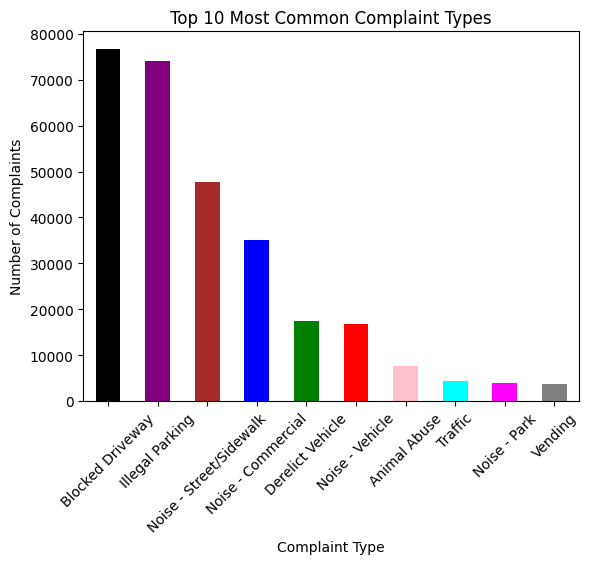

In [58]:
complaint_counts = df['Complaint Type'].value_counts().head(10)
complaint_counts.plot(kind='bar', color=["black","purple","brown","blue","green","red","pink","cyan","magenta","gray"])
plt.title('Top 10 Most Common Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation= 45)
plt.show()


### 4.1.2 Cities with Most Complaints

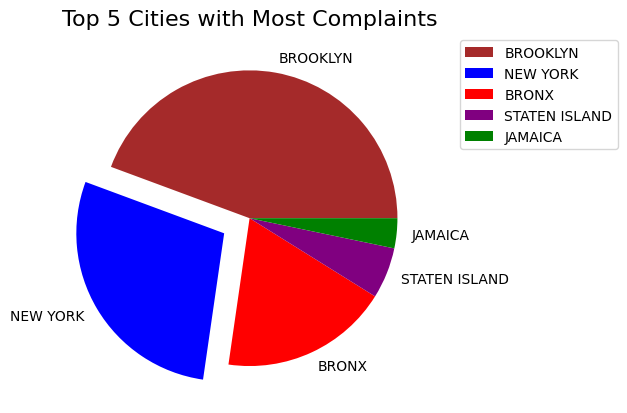

In [59]:
city_counts = df['City'].value_counts()
top5_cities = city_counts.head(5)
plt.pie(
    top5_cities, 
    labels=top5_cities.index,
    colors=["brown", "blue", "red", "purple", "green"],
    explode=[0, 0.2, 0, 0, 0],  # Exploding the 2nd slice
    
)
plt.title('Top 5 Cities with Most Complaints', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### 4.1.3. Resolution Time Distribution

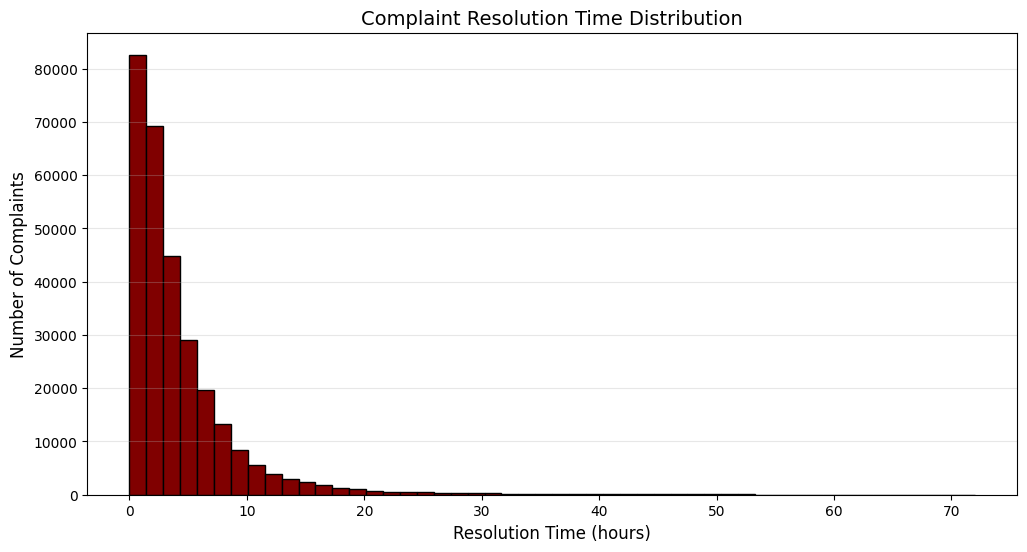

In [60]:
plt.figure(figsize=(12,6))
plt.hist(df['Request_Closing_Time'].dt.total_seconds()/3600, 
         bins=50, color='maroon', edgecolor='black', range=(0,72))
plt.title('Complaint Resolution Time Distribution', fontsize=14)
plt.xlabel('Resolution Time (hours)', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [61]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0 days 00:38:29,0
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31,0
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17,0
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33,0


### 4.1.4. Hourly Complaint Pattern

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3596\1194812664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Created Date'].dt.hour


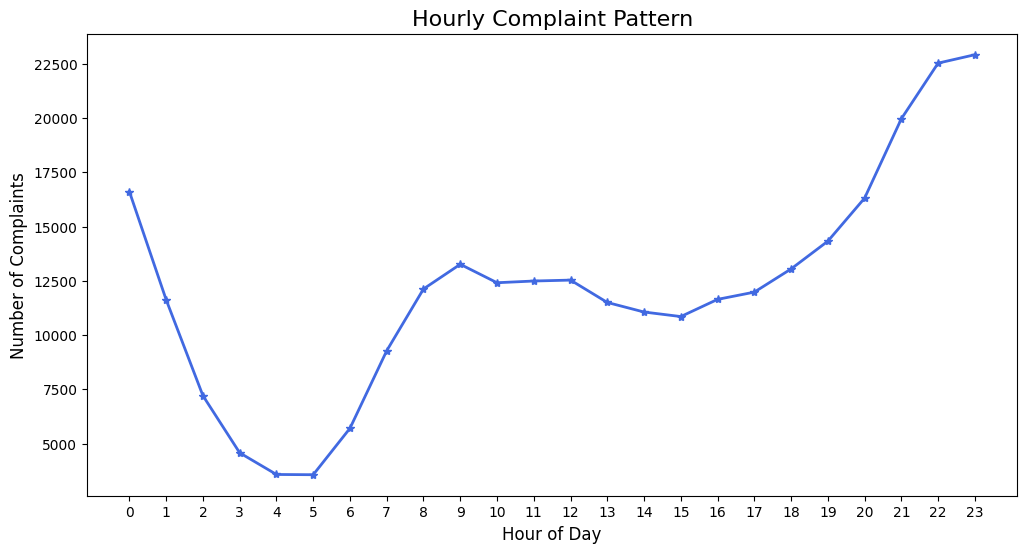

In [62]:
df['Hour'] = df['Created Date'].dt.hour
plt.figure(figsize=(12, 6))
df['Hour'].value_counts().sort_index().plot(
    kind='line', color='royalblue', marker='*', linewidth=2
)
plt.title('Hourly Complaint Pattern', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

### 4.2. Complaint types according to their average 'Request_Closing_Time' with graph. 

### Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. Illustrate it through graph as well.


<Figure size 1400x800 with 0 Axes>

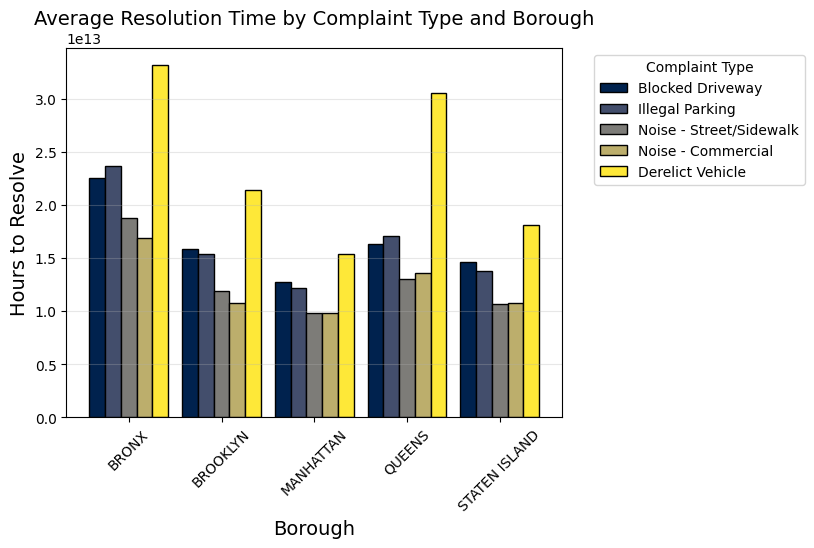

In [63]:
avg_times = df.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean().unstack()

top_complaints = df['Complaint Type'].value_counts().head(5).index
avg_times = avg_times[top_complaints]

plt.figure(figsize=(14, 8))
avg_times.plot(kind='bar', colormap='cividis',edgecolor='black', width=0.85)

plt.title('Average Resolution Time by Complaint Type and Borough', fontsize=14)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Hours to Resolve', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.show()

### 5. Statistical Testing (Test 1)

### Perform the statistical test and provide the p-value. (Test 1)

In [64]:
!pip install scipy
import scipy
from scipy import stats


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from scipy import stats

# Include additional complaint types
top_complaints = ['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Noise - Commercial']

# Filter the dataset and make a copy
filtered_df = df[df['Complaint Type'].isin(top_complaints)].copy()

# Convert 'Request_Closing_Time' to total seconds
filtered_df['Request_Closing_Time_seconds'] = filtered_df['Request_Closing_Time'].dt.total_seconds()

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    filtered_df[filtered_df['Complaint Type'] == 'Blocked Driveway']['Request_Closing_Time_seconds'].dropna(),
    filtered_df[filtered_df['Complaint Type'] == 'Illegal Parking']['Request_Closing_Time_seconds'].dropna(),
    filtered_df[filtered_df['Complaint Type'] == 'Noise - Street/Sidewalk']['Request_Closing_Time_seconds'].dropna(),
    filtered_df[filtered_df['Complaint Type'] == 'Noise - Commercial']['Request_Closing_Time_seconds'].dropna()
)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 1051.9452065057806
P-value: 0.0


### Perform the statistical test and provide the p-value. (Test 2)

In [66]:
from scipy.stats import chi2_contingency
contin_tab = pd.crosstab(df['Complaint Type'], df['City'])

chi2, p_value, dof, expected = chi2_contingency(contin_tab)

print("Chi-Square statistic:", chi2)
print("P-value:", p_value)
print("Degree of Freedom:", dof)

Chi-Square statistic: 105247.14233091185
P-value: 0.0
Degree of Freedom: 728
